<a href="https://colab.research.google.com/github/mendozalf/machinelearning/blob/main/final_bank_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Filter the data - if the poutcome is "nonexistent" that data isn't very useful
#filtered_campaign = campaign[campaign['poutcome'] != 'nonexistent'].copy()

In [ ]:
# Decide which features to use
features = ['poutcome', 'job']
X = pd.get_dummies(campaign[features], drop_first=True)
y = campaign['y']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Oversample the success occurences in the training set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Value counts for debugging
y_train_resampled.value_counts()

,count
y,
no,26333
yes,26333


In [ ]:
# Train the model using the resampled training data

# Tree
#clf = DecisionTreeClassifier()

# Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=30)

clf.fit(X_train_resampled, y_train_resampled)
clf.score(X_train_resampled, y_train_resampled)


0.6299130368738844

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

          no       0.91      0.89      0.90      6528
         yes       0.31      0.37      0.34       886

    accuracy                           0.82      7414
   macro avg       0.61      0.63      0.62      7414
weighted avg       0.84      0.82      0.83      7414



In [ ]:
# Export the results to a csv file

# Load holdout test data
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
#test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Ensure consistent one-hot encoding
test_encoded = pd.get_dummies(test[features], drop_first=True)

# Align columns with training data (reindex)
test_encoded = test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict on holdout test set
predictions = clf.predict(test_encoded)

# Convert predictions to a DataFrame
my_predictions = pd.DataFrame(predictions, columns=['y'])

# Replace 'success' with 1 and 'failure' with 0
my_predictions['y'] = my_predictions['y'].map({'yes': 1, 'no': 0})

my_predictions.to_csv("team2-module2-predictions.csv", index=False)

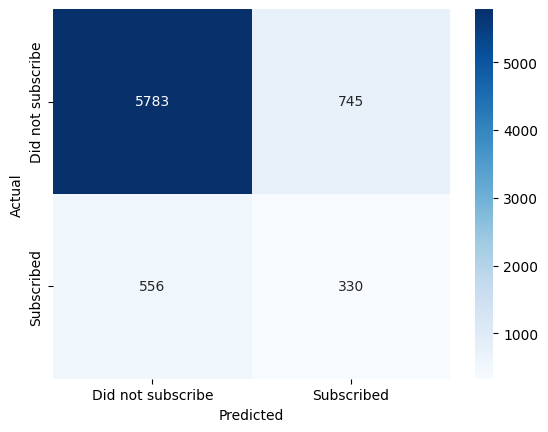

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['Did not subscribe', 'Subscribed']

# Create heatmap with custom labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()